In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

#regression models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

#metrics
from sklearn import metrics
#crossval
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#dimention increasing
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df=pd.read_csv('winemag-data_first150k.csv')


In [3]:
df.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [4]:
df.tail(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
150920,150920,Italy,"Rich and mature aromas of smoke, earth and her...",Brut Riserva,91,19.0,Northeastern Italy,Trento,NaN,Champagne Blend,Letrari
150921,150921,France,Shows some older notes: a bouquet of toasted w...,Blanc de Blancs Brut Mosaïque,91,38.0,Champagne,Champagne,NaN,Champagne Blend,Jacquart
150922,150922,Italy,Made by 30-ish Roberta Borghese high above Man...,Superiore,91,NaN,Northeastern Italy,Colli Orientali del Friuli,NaN,Tocai,Ronchi di Manzano
150923,150923,France,"Rich and toasty, with tiny bubbles. The bouque...",Demi-Sec,91,30.0,Champagne,Champagne,NaN,Champagne Blend,Jacquart
150924,150924,France,"Really fine for a low-acid vintage, there's an...",Diamant Bleu,91,70.0,Champagne,Champagne,NaN,Champagne Blend,Heidsieck & Co Monopole
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset
150929,150929,Italy,More Pinot Grigios should taste like this. A r...,NaN,90,15.0,Northeastern Italy,Alto Adige,NaN,Pinot Grigio,Alois Lageder


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [6]:
df.shape

(150930, 11)

look at missing values 

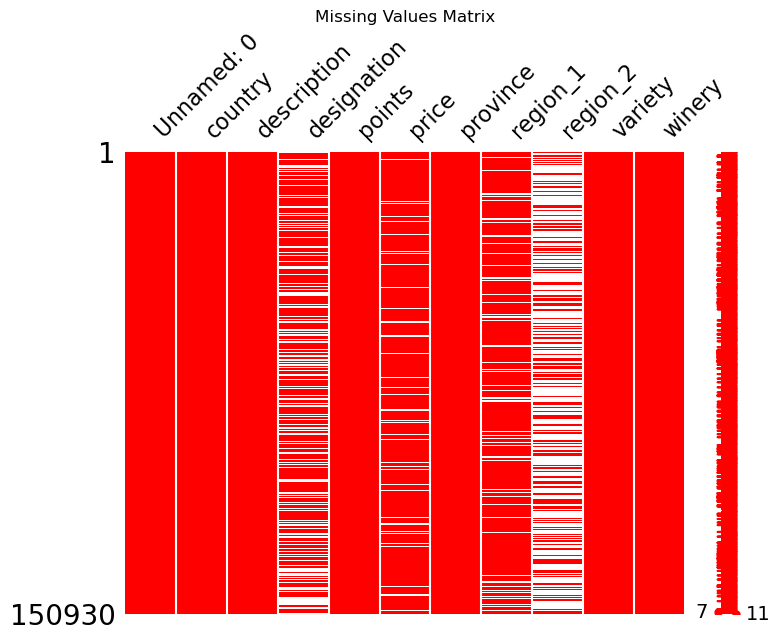

In [7]:
import missingno as msn
msn.matrix(df, figsize=(8, 6), color=(1, 0, 0))  # Setting a custom color
plt.title('Missing Values Matrix')
plt.show()

In [8]:
df.isnull().sum()

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

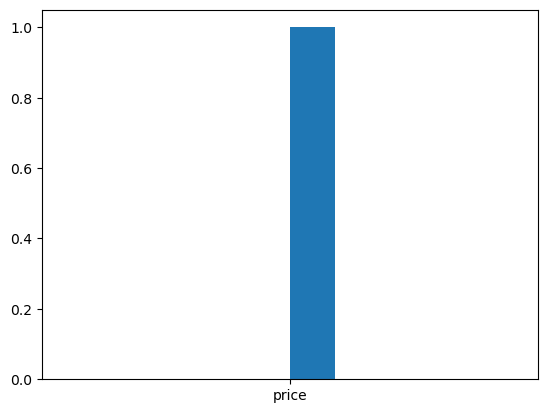

In [9]:
x1=['price']
plt.hist(x1,bins=10)
plt.show()


distribution of price is not normal so we fill null values with median


In [10]:
df['price'] = df['price'].fillna(df['price'].median())
df.isnull().sum()

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price              0
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

we fill region_1 column with 'unknown' and remove some null rows country,variety and winery columns

In [11]:
df['region_1'].fillna('Unknown', inplace=True)
df.isnull().sum()
na_rows=['country','variety','winery']
for i in na_rows:
   df.dropna(subset=na_rows, inplace=True)

In [12]:
df.isnull().sum()

Unnamed: 0         0
country            0
description        0
designation    45735
points             0
price              0
province           0
region_1           0
region_2       89972
variety            0
winery             0
dtype: int64

and we remove some columns since we dont need them to analyze

In [13]:
df.drop('description',axis=1,inplace=True)
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop('region_2',axis=1,inplace=True)
df.drop('designation',axis=1,inplace=True)

In [14]:
df.drop('country',axis=1,inplace=True)

In [15]:
df.head(10)

,points,price,province,region_1,variety,winery
0,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
2,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude
5,95,73.0,Northern Spain,Toro,Tinta de Toro,Numanthia
6,95,65.0,Northern Spain,Toro,Tinta de Toro,Maurodos
7,95,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
8,95,65.0,Oregon,Chehalem Mountains,Pinot Noir,Bergström
9,95,60.0,California,Sonoma Coast,Pinot Noir,Blue Farm


In [16]:

df.isnull().sum().sum()

0

We should covert Categorical Features to numbers, because ML Models cannot work with categorical features.

Label Encoding : converting categorical features into numerical features.
One hot encoding : convert each categorical value into new categorical column and assign a binary value of 0 to 1 to them
Dummy variable trap : occurs when 2 or more dummy variables created by one hit encoding are highly correlated(multicolinear).

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [20]:
categorical_data=['province','region_1','variety','winery']
df2= pd.get_dummies(df, columns=categorical_data, drop_first=True)
df2


,points,price,province_Aconcagua Costa,province_Aconcagua Valley,province_Aegean,province_Ahr,province_Aigialias Slopes,province_Alenquer,province_Alentejano,province_Alentejo,...,winery_Çamlibağ,winery_Ébano,winery_Écluse,winery_Élevée Winegrowers,winery_Éric & Jöel Durand,winery_Ñandú,winery_Único Luis Miguel,winery_àMaurice,winery_áster,winery_Štoka
0,96,235.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,96,110.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,96,90.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,96,65.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,95,66.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150925,91,20.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150926,91,27.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150927,91,20.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150928,90,52.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df2.isnull().any().any()

False

correlation

we split target value and predictors (x,y)

In [24]:
features = ['points','province','region_1','variety','winery']
x = df.loc[:, features]
y = df.loc[:, ['price']]


In [25]:
x

,points,province,region_1,variety,winery
0,96,California,Napa Valley,Cabernet Sauvignon,Heitz
1,96,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
2,96,California,Knights Valley,Sauvignon Blanc,Macauley
3,96,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,95,Provence,Bandol,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...
150925,91,Southern Italy,Fiano di Avellino,White Blend,Feudi di San Gregorio
150926,91,Champagne,Champagne,Champagne Blend,H.Germain
150927,91,Southern Italy,Fiano di Avellino,White Blend,Terredora
150928,90,Champagne,Champagne,Champagne Blend,Gosset


In [26]:
x.isnull().any().any()

False

we split test train 

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size = .70)

In [44]:
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(x_train)
X_test_scaled = sc.transform(x_test)

scaling

create linear model

In [45]:
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [47]:
y_pred=regressor.predict(X_train_scaled)

In [48]:
linear_score = metrics.r2_score(y_test, y_pred)
linear_score

1.0

metrics

In [49]:
def Evaluation(x_test, y_test, model) :
    y_pred = model.predict(x_test)    
    mse = metrics.mean_absolute_error(y_test, y_pred)
    msqe = metrics.mean_squared_error(y_test, y_pred)
    r2_score = metrics.r2_score(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print("mean_absolute_error : ", mse)
    print("mean_squared_error  : ", msqe)
    print("root_mean_absolute_error", rmse)
    print("R2_score            : ", r2_score)

In [50]:
Evaluation(x_test,y_test,regressor)

mean_absolute_error :  8.048984748178078e-15
mean_squared_error  :  9.951393991220191e-29
root_mean_absolute_error 9.975667391819051e-15
R2_score            :  1.0


In [51]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0.80,0.80
1,0.80,0.80
2,0.80,0.80
3,0.80,0.80
4,0.75,0.75
...,...,...
150920,0.55,0.55
150921,0.55,0.55
150922,0.55,0.55
150923,0.50,0.50


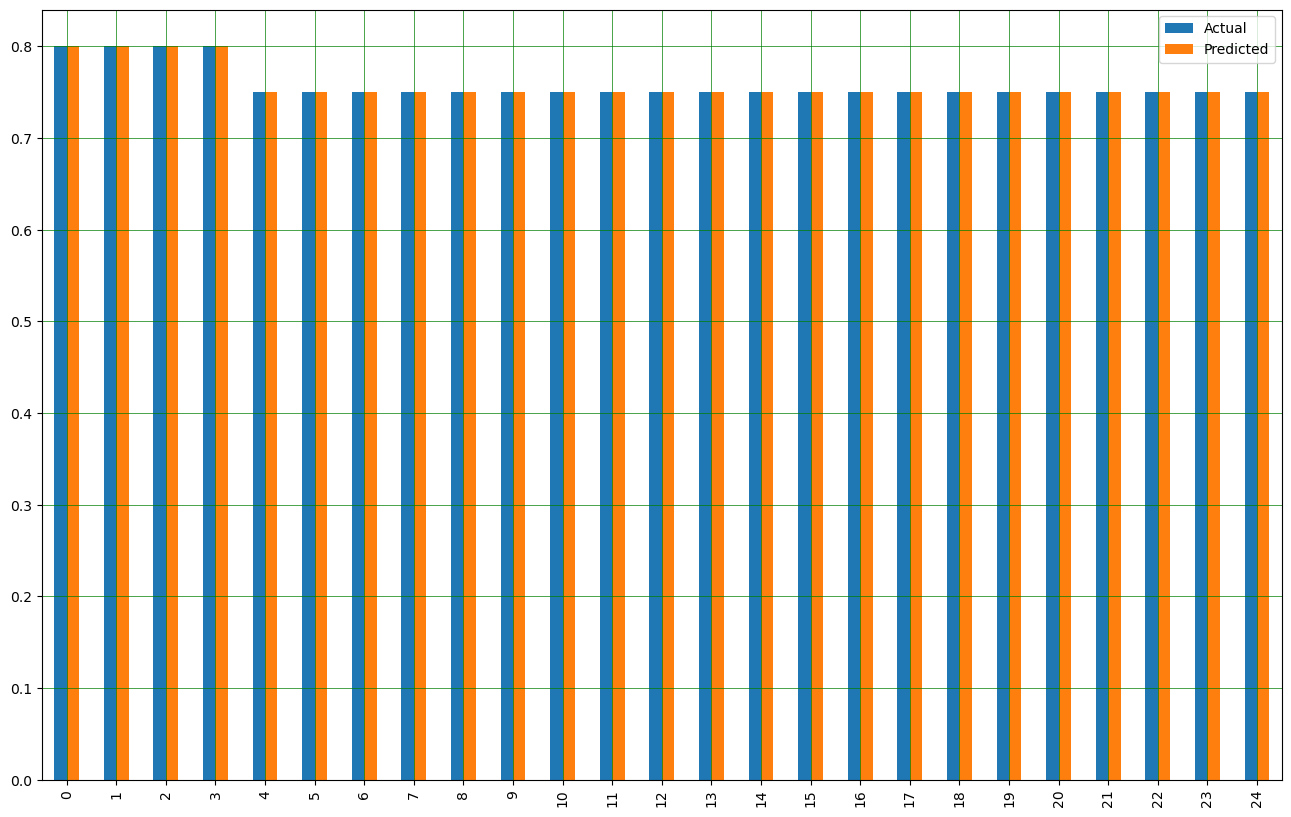

In [52]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

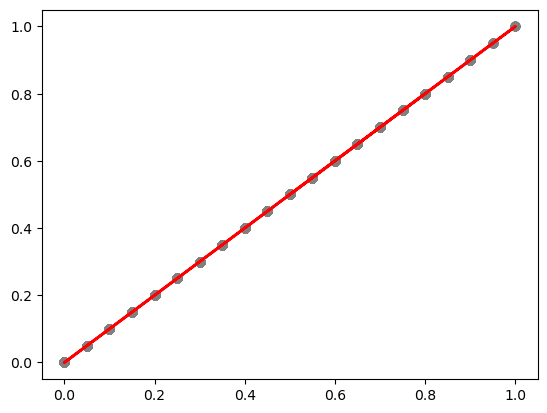

In [53]:
plt.scatter(x_test, y_test,  color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

as we see,it is overfitting because moodel learns by heart so we should handle overfitting

ridge 

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.3)

In [69]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

D:\kurulumlar\anaconda\lib\site-packages\sklearn\utils\extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
D:\kurulumlar\anaconda\lib\site-packages\sklearn\utils\extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
D:\kurulumlar\anaconda\lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [70]:
alpha = 10**np.linspace(10,-2,100)*0.5 

In [71]:
ridge_cv = RidgeCV(alphas=alpha, scoring="neg_mean_squared_error", cv=10)
ridge_cv.fit(x_train_scaled, y_train)

ValueError: 
All the 1000 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "D:\kurulumlar\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\kurulumlar\anaconda\lib\site-packages\sklearn\linear_model\_ridge.py", line 1126, in fit
    X, y = self._validate_data(
  File "D:\kurulumlar\anaconda\lib\site-packages\sklearn\base.py", line 565, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "D:\kurulumlar\anaconda\lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
  File "D:\kurulumlar\anaconda\lib\site-packages\sklearn\utils\validation.py", line 921, in check_array
    _assert_all_finite(
  File "D:\kurulumlar\anaconda\lib\site-packages\sklearn\utils\validation.py", line 161, in _assert_all_finite
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


polynomial regression

In [63]:
x = pd.DataFrame(df, columns=['province','points','region_1','winery','variety','price'])
x.reset_index(drop=True, inplace=True)


In [64]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)        # array
x_poly = pd.DataFrame(x_poly, columns=poly_features.get_feature_names_out(x.columns))   # dataFrame
x_poly

ValueError: Input X contains NaN.
PolynomialFeatures does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values